In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

%matplotlib inline

In [2]:
train_df = pd.read_parquet('../data/rf_features_train.parquet')

[03:32:07.231 WARNING] /nas/local/simscripts/aklein/envs/cs221/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [

[03:32:07.232 WARNING] /nas/local/simscripts/aklein/envs/cs221/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)

[03:32:07.233 WARNING] /nas/local/simscripts/aklein/envs/cs221/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels



In [3]:
test_df = pd.read_parquet('../data/rf_features_validate.parquet')

In [4]:
# train full
X = train_df.loc[:, train_df.columns != 'score']
y = train_df.score

# test full
Xtst = test_df.loc[:, test_df.columns != 'score']
ytst = test_df.score

In [75]:
# final fit estimator
rf = RandomForestRegressor(n_estimators=25, max_features=225, max_depth=60, n_jobs=-1)

In [73]:
Xfinal = pd.concat([X, Xtst], axis=0)
yfinal = pd.concat([y, ytst], axis=0)

In [76]:
rf.fit(Xfinal, yfinal)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=60,
                      max_features=225, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [77]:
import pickle
with open('estimator.pkl', 'wb') as f:
    pickle.dump(rf, f, protocol=pickle.HIGHEST_PROTOCOL)

In [81]:
r2_score(rf.predict(Xfinal), yfinal)

0.9786080598860698

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
max_depths = np.linspace(1, 32, 32, endpoint=True)

In [7]:
# estimator grid
train_results = []
test_results = []
for n in n_estimators:
    print(f"Training {n}")
    rf = RandomForestRegressor(n_estimators=n, max_depth=15, n_jobs=-1)
    rf.fit(X, y)
    train_pred = rf.predict(X)
    train_mse = mean_squared_error(train_pred, y)
    train_results.append(train_mse)
    test_pred = rf.predict(Xtst)
    test_mse = mean_squared_error(test_pred, ytst)
    test_results.append(test_mse)

Training 1
Training 2
Training 4
Training 8
Training 16
Training 32
Training 64
Training 100


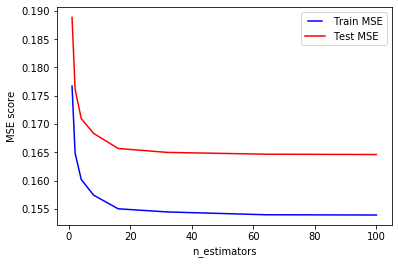

In [8]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline 

line1, = plt.plot(n_estimators, train_results, 'b', label='Train MSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('n_estimators')
plt.show()

In [9]:
# depth grid
train_results = []
test_results = []
for d in max_depths:
    print(f"Training {d}")
    rf = RandomForestRegressor(n_estimators=20, max_depth=d, n_jobs=-1)
    rf.fit(X, y)
    train_pred = rf.predict(X)
    train_mse = mean_squared_error(train_pred, y)
    train_results.append(train_mse)
    test_pred = rf.predict(Xtst)
    test_mse = mean_squared_error(test_pred, ytst)
    test_results.append(test_mse)

Training 1.0
Training 2.0
Training 3.0
Training 4.0
Training 5.0
Training 6.0
Training 7.0
Training 8.0
Training 9.0
Training 10.0
Training 11.0
Training 12.0
Training 13.0
Training 14.0
Training 15.0
Training 16.0
Training 17.0
Training 18.0
Training 19.0
Training 20.0
Training 21.0
Training 22.0
Training 23.0
Training 24.0
Training 25.0
Training 26.0
Training 27.0
Training 28.0
Training 29.0
Training 30.0
Training 31.0
Training 32.0


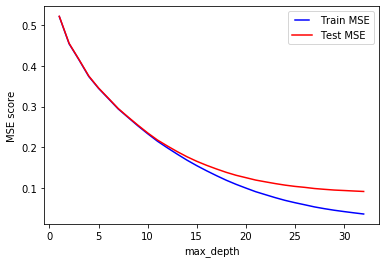

In [10]:
line1, = plt.plot(max_depths, train_results, 'b', label='Train MSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('max_depth')
plt.show()

In [65]:
# training size effect
sizes = np.arange(1, 20) * 50000

train_results = []
test_results = []
for i in sizes:
    print(f"Training {i}")
    rf = RandomForestRegressor(n_estimators=20, max_depth=30, max_features=175, n_jobs=-1)
    rf.fit(X.loc[:i], y.loc[:i])
    train_pred = rf.predict(X.loc[:i])
    train_mse = mean_squared_error(train_pred, y.loc[:i])
    train_results.append(train_mse)
    test_pred = rf.predict(Xtst)
    test_mse = mean_squared_error(test_pred, ytst)
    test_results.append(test_mse)

Training 50000
Training 100000
Training 150000
Training 200000
Training 250000
Training 300000
Training 350000
Training 400000
Training 450000
Training 500000
Training 550000
Training 600000
Training 650000
Training 700000
Training 750000
Training 800000
Training 850000
Training 900000
Training 950000


In [66]:
r2_score(test_pred, ytst)

0.7992520507813237

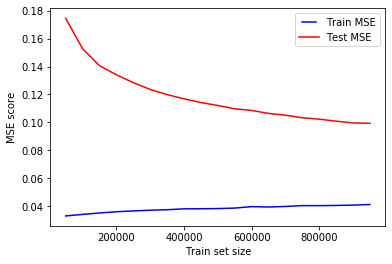

In [67]:
line1, = plt.plot(sizes, train_results, 'b', label='Train MSE')
line2, = plt.plot(sizes, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Train set size')
plt.show()

In [38]:
max_features = np.linspace(10, X.shape[1], 20, endpoint=True).astype(np.int64)

In [39]:
max_features

array([ 10,  43,  77, 110, 144, 178, 211, 245, 279, 312, 346, 379, 413,
       447, 480, 514, 548, 581, 615, 649])

In [40]:
# depth grid
train_results = []
test_results = []
for f in max_features:
    print(f"Training {f}")
    rf = RandomForestRegressor(n_estimators=20, max_depth=30, max_features=f, n_jobs=-1)
    rf.fit(X, y)
    train_pred = rf.predict(X)
    train_mse = mean_squared_error(train_pred, y)
    train_results.append(train_mse)
    test_pred = rf.predict(Xtst)
    test_mse = mean_squared_error(test_pred, ytst)
    test_results.append(test_mse)

Training 10
Training 43
Training 77
Training 110
Training 144
Training 178
Training 211
Training 245
Training 279
Training 312
Training 346
Training 379
Training 413
Training 447
Training 480
Training 514
Training 548
Training 581
Training 615
Training 649


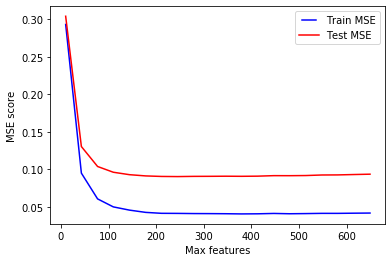

In [45]:
line1, = plt.plot(max_features, train_results, 'b', label='Train MSE')
line2, = plt.plot(max_features, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Max features')
plt.show()

In [55]:
min_samples_splits = np.linspace(2, 10, 9, endpoint=True)
train_results = []
test_results = []
for m in min_samples_splits:
    print(f"Training {m}")
    rf = RandomForestRegressor(n_estimators=20, max_depth=30, min_samples_split=int(m), n_jobs=-1)
    rf.fit(X, y)
    train_pred = rf.predict(X)
    train_mse = mean_squared_error(train_pred, y)
    train_results.append(train_mse)
    test_pred = rf.predict(Xtst)
    test_mse = mean_squared_error(test_pred, ytst)
    test_results.append(test_mse)

Training 2.0
Training 3.0
Training 4.0
Training 5.0
Training 6.0
Training 7.0
Training 8.0
Training 9.0
Training 10.0


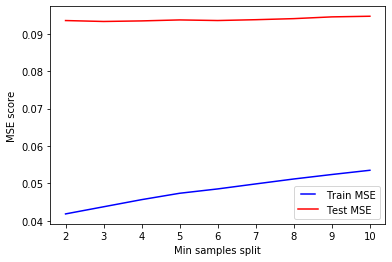

In [56]:
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train MSE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test MSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE score')
plt.xlabel('Min samples split')
plt.show()